In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_wine
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from keras.layers import Dropout
from tensorflow.keras.activations import relu,sigmoid, softmax, tanh
from tensorflow.keras.initializers import glorot_normal
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV 
from scikeras.wrappers import KerasClassifier

In [ ]:
# Loading dataset
wine_data = load_wine()
# # Configuring pandas to show all features
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# Converting data to a dataframe to view properly
df = pd.DataFrame(data=wine_data['data'],columns=wine_data['feature_names'])
# Printing first 5 observations
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# EDA

The column name % of diluted wines is not named properly so we rename the column.

In [ ]:
df = df.rename(columns={'od280/od315_of_diluted_wines': '% of diluted_wines'})

In [ ]:
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
Y = wine_data['target']
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
df['label']= Y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,% of diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.shape

(178, 14)

In [ ]:
df.dtypes

alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity_of_ash       float64
magnesium               float64
total_phenols           float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
% of diluted_wines      float64
proline                 float64
label                     int64
dtype: object

In [ ]:
df.isnull().sum()

alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
% of diluted_wines      0
proline                 0
label                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   alcalinity_of_ash     178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  % of diluted_wines    178 non-null    float64
 12  proline               178 non-null    float64
 13  label                 178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [ ]:
X = df.drop('label', axis=1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,% of diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
Y = df['label']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
set(Y) #number of classes in target Y

{0, 1, 2}

In [ ]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
x_train, X_val, y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [ ]:
X_train.keys()

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', '% of diluted_wines',
       'proline'],
      dtype='object')

In [ ]:
print ("Shape of X_train = ",X_train.shape)
print ("Shape of Y_train = ",Y_train.shape)
print ("Shape of X_test = ",X_test.shape)
print ("Shape of Y_test = ",Y_test.shape)

Shape of X_train =  (142, 13)
Shape of Y_train =  (142,)
Shape of X_test =  (36, 13)
Shape of Y_test =  (36,)


In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense #Y = Wx+b
from keras.layers import Flatten #converts multidimensional image to a vector
from keras.layers import Activation
from keras.utils import np_utils
#from keras.layers import Dense, Flatten, Activation

In [ ]:
Y_train[0:5]

4      0
164    2
145    2
135    2
94     1
Name: label, dtype: int64

In [ ]:
train = X_train.copy()
train['label'] = Y_train

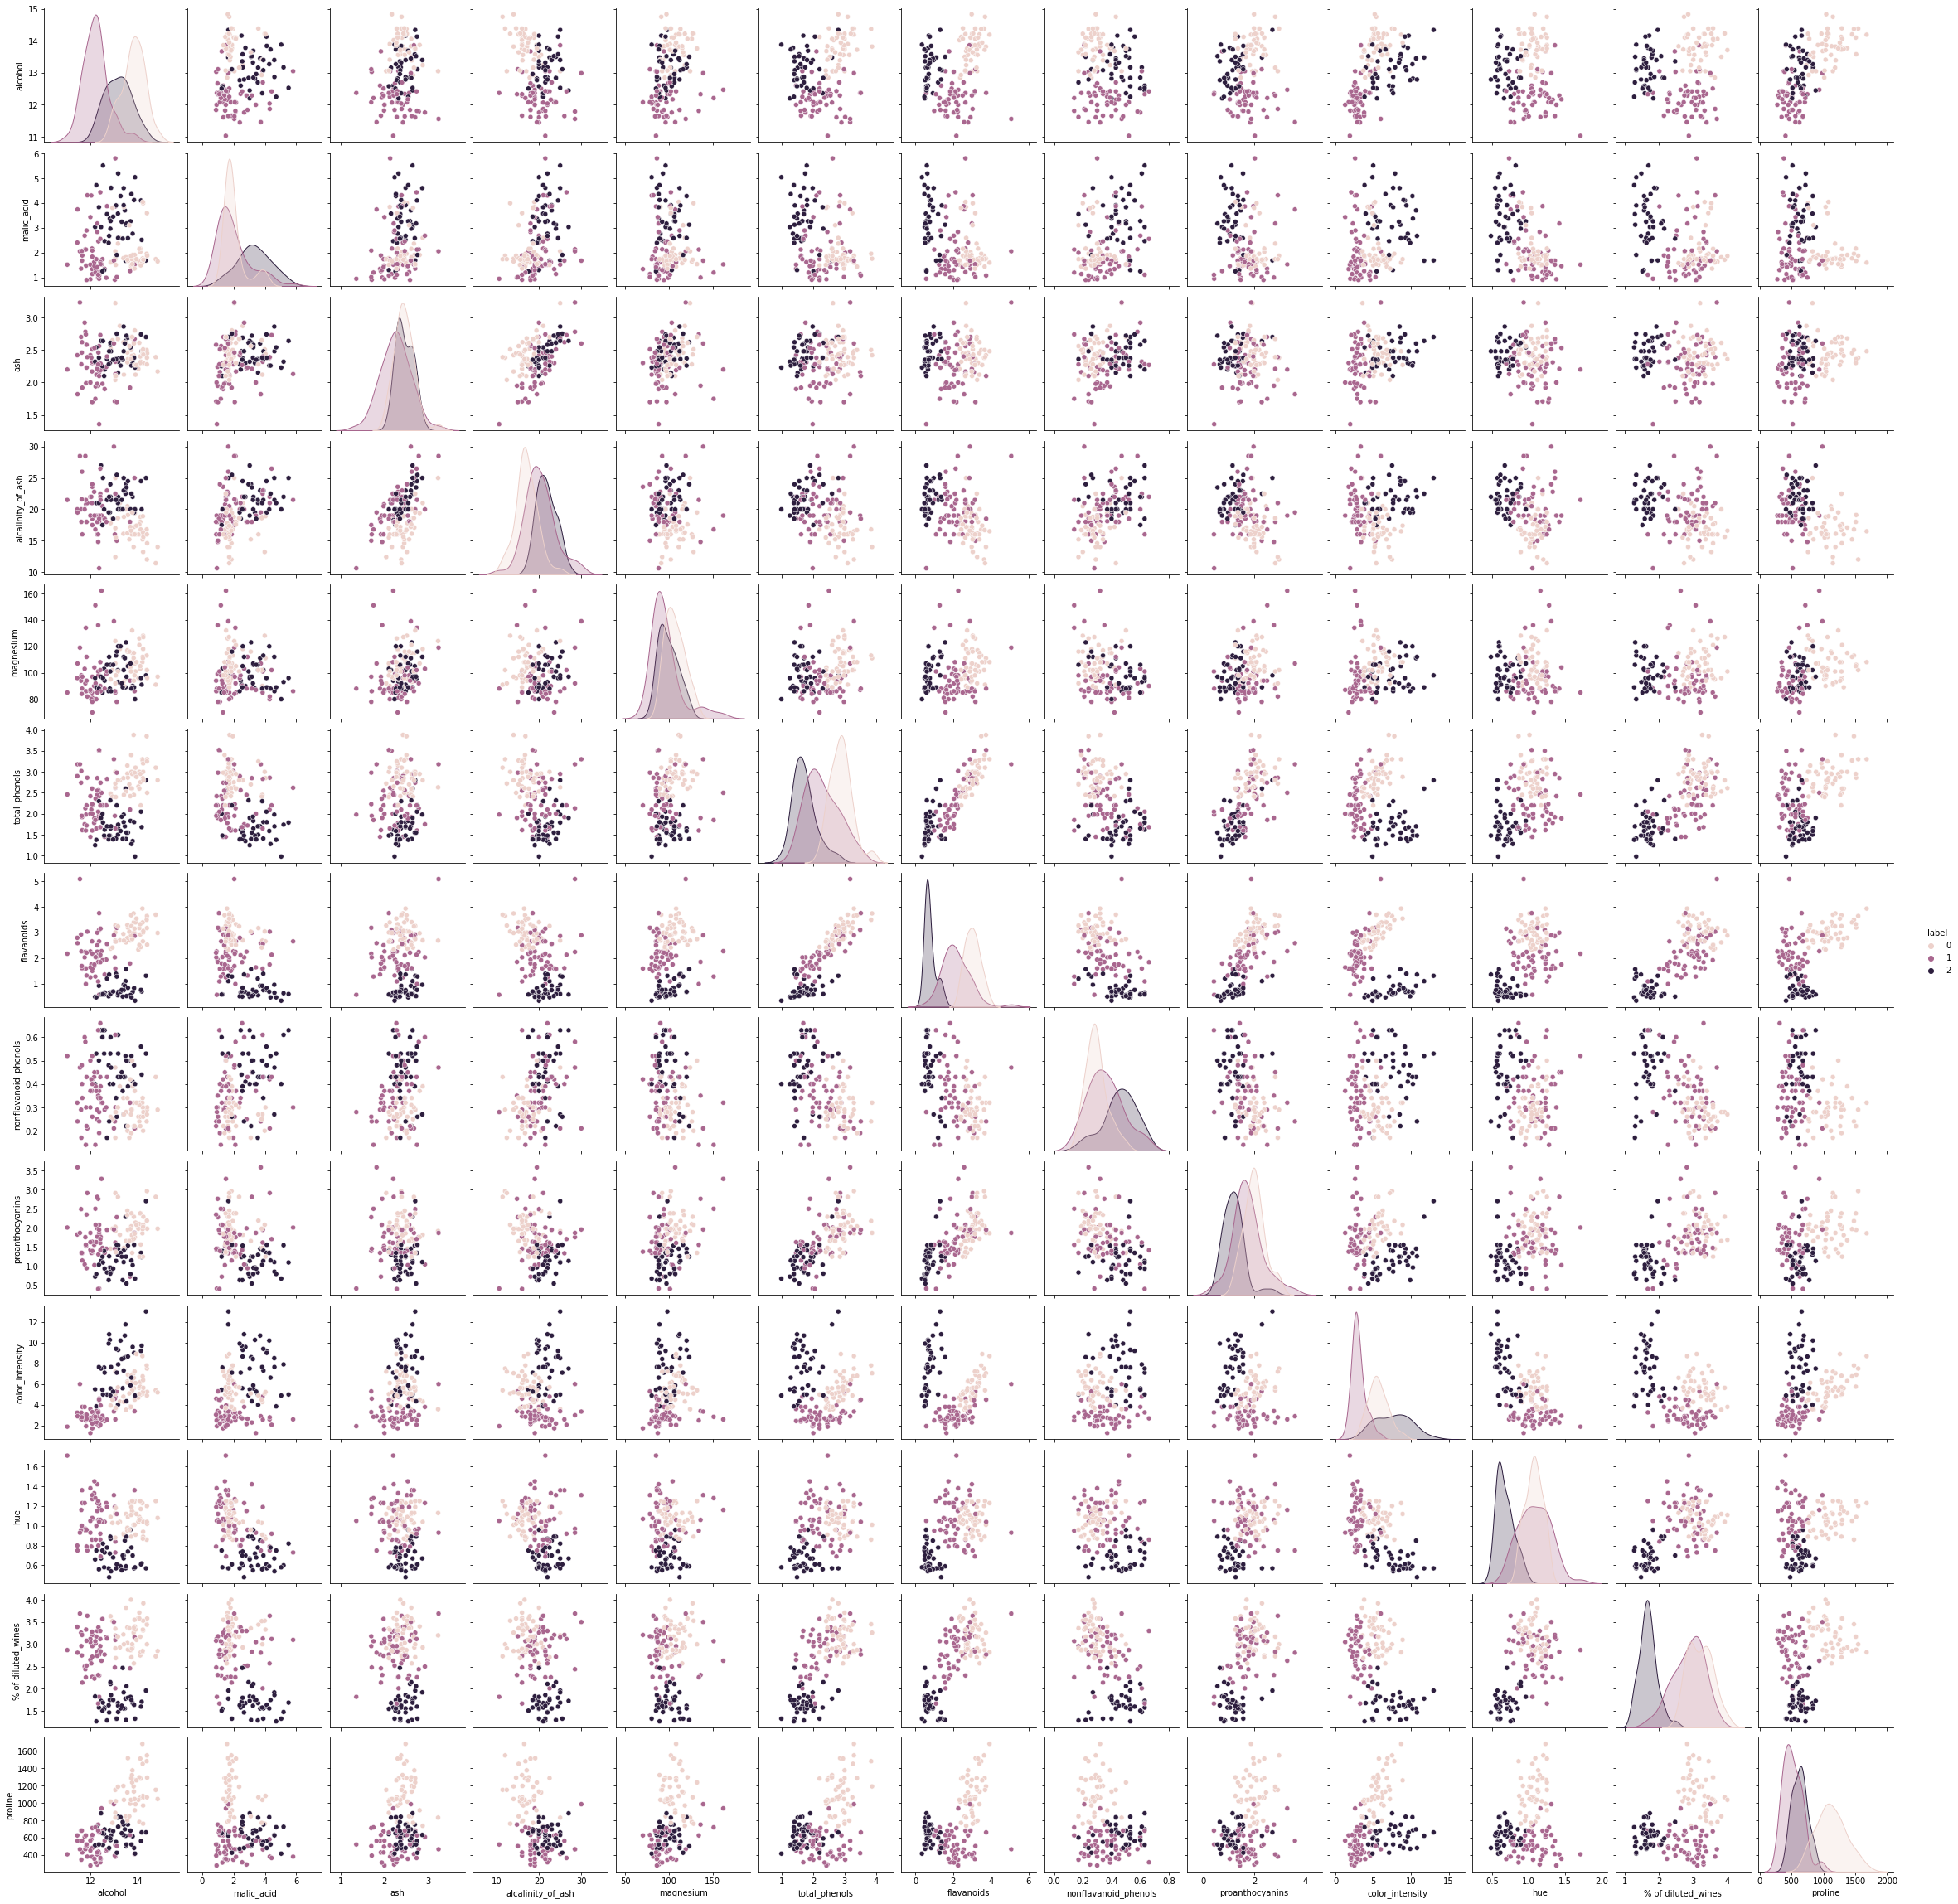

In [ ]:
sns.pairplot(train,hue='label')

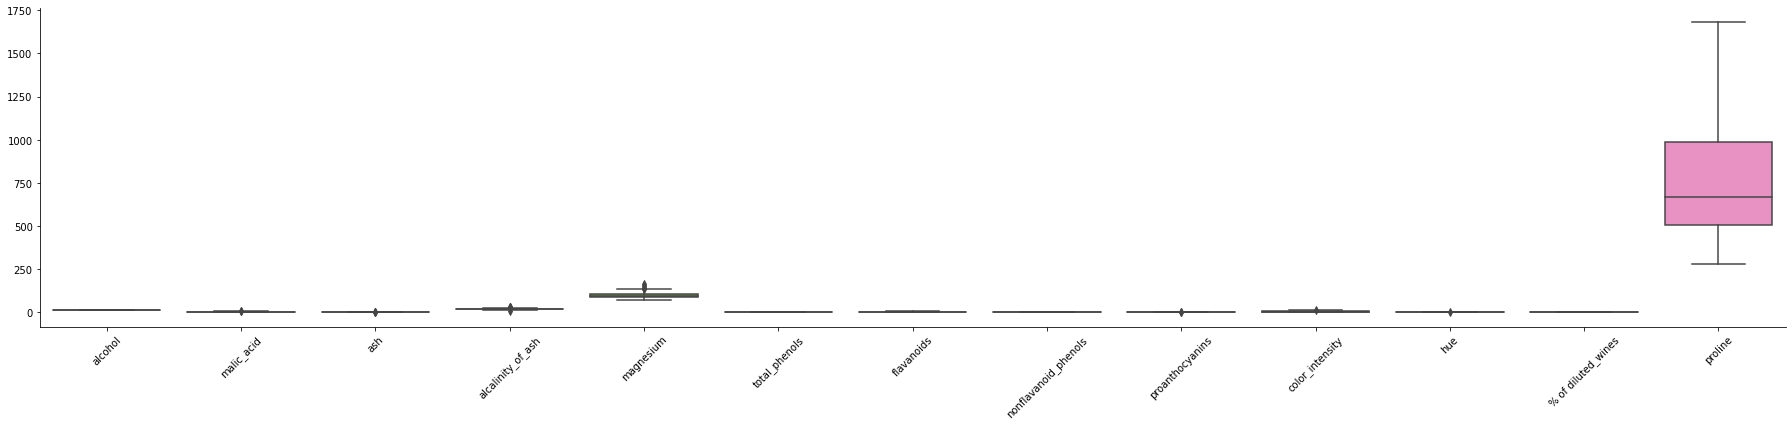

In [ ]:
sns.catplot(data=X_train, kind='box', height=5, aspect=5)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Features Correlating with label')

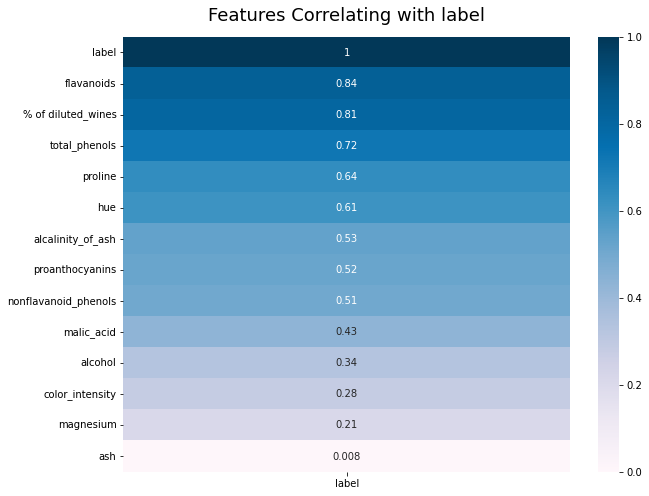

In [ ]:
plt.figure(figsize=(10,8))
#rank the absolute values of the parameters' correlation
heatmap = sns.heatmap(abs(train.corr()[['label']]).sort_values(by='label', ascending=False), vmin=0, vmax=1, annot=True, cmap='PuBu')
heatmap.set_title('Features Correlating with label', fontdict={'fontsize':18}, pad=16)

# Neural Network

In [ ]:
print ("Shape of X_train = ",X_train.shape)
print ("Shape of X_test = ",X_test.shape)

Shape of X_train =  (142, 13)
Shape of X_test =  (36, 13)


In [ ]:
# one hot encoding 
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [ ]:
Y_train[0] 

array([1., 0., 0.], dtype=float32)

In [ ]:
print ("Shape of Y_train = ",Y_train.shape)
print ("Shape of Y_test = ",Y_test.shape)

Shape of Y_train =  (142, 3)
Shape of Y_test =  (36, 3)


In [ ]:
# Create a fully connected  2 layer Neural Network
model = Sequential()
model.add(Flatten(input_shape=(13, )))
model.add(Dense(486)) 
model.add(Activation('relu')) #relu = max(0,x) #sigmoid
model.add(Dropout(0.1)) #10% of the neurons in random will be deactivcated during training
model.add(Dense(3)) # create 2nd hidden layer with 3 neurons as there are 3 classes/labels
model.add(Activation('softmax'))
#optimizer can be SGD and you can specify the learning rate (step size)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_123 (Flatten)       (None, 13)                0         
                                                                 
 dense_246 (Dense)           (None, 486)               6804      
                                                                 
 activation_2 (Activation)   (None, 486)               0         
                                                                 
 dropout_1 (Dropout)         (None, 486)               0         
                                                                 
 dense_247 (Dense)           (None, 3)                 1461      
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
Total params: 8,265
Trainable params: 8,265
Non-trai

In [ ]:
print ("Shape of X_train = ",X_train.shape)
print ("Shape of Y_train = ",Y_train.shape)
print ("Shape of X_test = ",X_test.shape)
print ("Shape of Y_test = ",Y_test.shape)

Shape of X_train =  (142, 13)
Shape of Y_train =  (142, 3)
Shape of X_test =  (36, 13)
Shape of Y_test =  (36, 3)


In [ ]:
import os
print (os.listdir())

['.config', 'NN_wine20.h5', 'NN_wine07.h5', 'NN_wine36.h5', 'NN_wine22.h5', 'NN_wine23.h5', 'NN_wine47.h5', 'NN_wine21.h5', 'NN_wine04.h5', 'NN_wine08.h5', 'NN_wine40.h5', 'NN_wine15.h5', 'NN_wine50.h5', 'NN_wine42.h5', 'NN_wine01.h5', 'NN_wine18.h5', 'NN_wine35.h5', 'NN_wine43.h5', 'NN_wine41.h5', 'NN_wine38.h5', 'NN_wine48.h5', 'NN_wine25.h5', 'NN_wine17.h5', 'NN_wine19.h5', 'NN_wine24.h5', 'NN_wine34.h5', 'NN_wine09.h5', 'NN_wine39.h5', 'NN_wine31.h5', 'NN_wine03.h5', 'NN_wine06.h5', 'NN_wine29.h5', 'NN_wine16.h5', 'NN_wine28.h5', 'NN_wine30.h5', 'NN_wine02.h5', 'NN_wine12.h5', 'NN_wine10.h5', 'NN_wine44.h5', 'NN_wine26.h5', 'NN_wine45.h5', 'NN_wine14.h5', 'NN_wine27.h5', 'NN_wine33.h5', 'NN_wine13.h5', 'NN_wine32.h5', 'NN_wine05.h5', 'NN_wine11.h5', 'NN_wine46.h5', 'NN_wine49.h5', 'NN_wine37.h5', 'sample_data']


In [ ]:
checkpoint = ModelCheckpoint('NN_wine{epoch:02d}.h5') #period = 2 
epochs = 50 #number of rounds of training over the entire training dataset
# Fit the model, verbose to false to avoid display of the progress
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=epochs, batch_size=128, callbacks =[checkpoint])

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 56.9487 - accuracy: 0.2655 - val_loss: 35.4892 - val_accuracy: 0.3103
Epoch 2/50
1/1 [==============================] - 0s 49ms/step - loss: 35.3994 - accuracy: 0.2832 - val_loss: 6.4280 - val_accuracy: 0.3103
Epoch 3/50
1/1 [==============================] - 0s 117ms/step - loss: 17.4137 - accuracy: 0.3009 - val_loss: 8.0771 - val_accuracy: 0.5172
Epoch 4/50
1/1 [==============================] - 0s 108ms/step - loss: 14.2133 - accuracy: 0.4513 - val_loss: 13.8061 - val_accuracy: 0.4828
Epoch 5/50
1/1 [==============================] - 0s 119ms/step - loss: 19.4678 - accuracy: 0.3717 - val_loss: 17.8178 - val_accuracy: 0.4828
Epoch 6/50
1/1 [==============================] - 0s 109ms/step - loss: 23.3549 - accuracy: 0.4159 - val_loss: 20.0679 - val_accuracy: 0.4828
Epoch 7/50
1/1 [==============================] - 0s 92ms/step - loss: 24.8225 - accuracy: 0.4867 - val_loss: 20.3666 - val_accuracy: 0.5172
Epoch 8/50
1/

In [ ]:
# Final evaluation of the model (final model from epoch 50)
scores = model.evaluate(X_test, Y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100)) #2nd values 
print("Loss: %.4f" % (scores[0])) #1st value in scores

Accuracy: 69.44%
Loss: 2.4720


In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

2/2 [==============================] - 0s 5ms/step
(36, 3)


In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

2/2 [==============================] - 0s 7ms/step
[[12  0  0]
 [ 4 11  0]
 [ 2  5  2]]


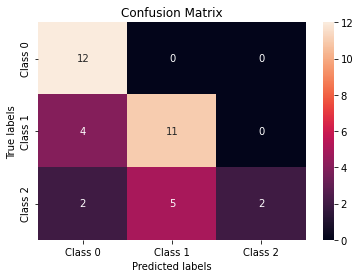

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Class 0','Class 1','Class 2']); ax.yaxis.set_ticklabels(['Class 0','Class 1','Class 2']);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.69      0.73      0.71        15
           2       1.00      0.22      0.36         9

    accuracy                           0.69        36
   macro avg       0.78      0.65      0.62        36
weighted avg       0.76      0.69      0.65        36



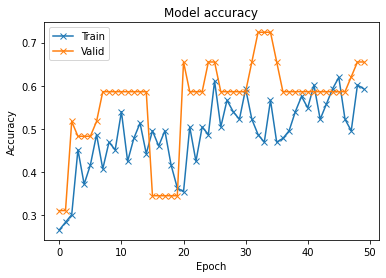

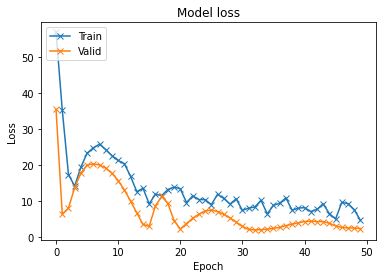

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'],'x-')
plt.plot(history.history['val_accuracy'],'x-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'],'x-')
plt.plot(history.history['val_loss'],'x-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Naïve Bayes

In [ ]:
model2_df = df.copy()

In [ ]:
Y2 = model2_df['label']
Y2.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
X2 = model2_df.drop('label', axis=1)
X2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,% of diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2)

In [ ]:
model2 = GaussianNB()
model2.fit(X_train2, Y_train2)
y2_pred = model2.predict(X_test2)
print("Accuracy: %.2f"
      % accuracy_score(y2_pred, Y_test2))
print("Classification Report for NB\n")
print(classification_report(Y_test2, y2_pred))

Accuracy: 0.94
Classification Report for NB

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.86      0.92        14
           2       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.96      0.94      0.95        36



In [ ]:
y2_pred=model2.predict(X_test2) 
cm2 = confusion_matrix(Y_test2, y2_pred)
print(cm2)

[[14  0  0]
 [ 0 12  2]
 [ 0  0  8]]


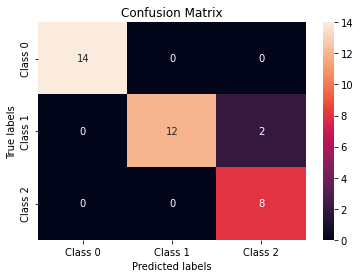

In [ ]:
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Class 0','Class 1','Class 2']); ax.yaxis.set_ticklabels(['Class 0','Class 1','Class 2']);

# Performance Improvement

In [ ]:
#scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:
def create_model():
    # Initialising the ANN
    classifier = Sequential()
    classifier.add(Flatten(input_shape=(13, )))
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(486, activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(3, activation = 'softmax'))
    # Compiling the ANN
    classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier

In [ ]:
model=KerasClassifier(model=create_model)

In [ ]:
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [100, 150, 300, 500, 750, 1000],
              'optimizer': ['adam']}

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = parameters)

In [ ]:
grid_search = grid_search.fit(X_train, Y_train, verbose = 0)

1/1 [==============================] - 0s 57ms/step


In [ ]:
grid_nn = GridSearchCV(model, param_grid=parameters, scoring='accuracy')

In [ ]:
print("The Best Parameter : ", grid_search.best_params_)

The Best Parameter :  {'batch_size': 64, 'epochs': 500, 'optimizer': 'adam'}


In [ ]:
print("The Best Score     : ", grid_search.best_score_)

The Best Score     :  0.993103448275862


In [ ]:
checkpoint2 = ModelCheckpoint('NN_wine{epoch:02d}.h5') #period = 2 
epochs = 150 #number of rounds of training over the entire training dataset
# Fit the model, verbose to false to avoid display of the progress
history3 = model.fit(X_train, Y_train, validation_split=0.2, epochs=epochs, batch_size=32, callbacks =[checkpoint2])

Epoch 1/150
4/4 [==============================] - 1s 59ms/step - loss: 1.0655 - accuracy: 0.4867 - val_loss: 0.8623 - val_accuracy: 0.8276
Epoch 2/150
4/4 [==============================] - 0s 11ms/step - loss: 0.7594 - accuracy: 0.9381 - val_loss: 0.6319 - val_accuracy: 0.9310
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.5492 - accuracy: 0.9735 - val_loss: 0.4705 - val_accuracy: 0.9310
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.4021 - accuracy: 0.9823 - val_loss: 0.3596 - val_accuracy: 0.9310
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 0.3035 - accuracy: 0.9912 - val_loss: 0.2834 - val_accuracy: 0.9310
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.2377 - accuracy: 0.9912 - val_loss: 0.2308 - val_accuracy: 0.9310
Epoch 7/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1898 - accuracy: 0.9912 - val_loss: 0.1949 - val_accuracy: 0.9310
Epoch 8/150
4/4 [===

In [ ]:
scores = history3.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (scores*100))

2/2 [==============================] - 0s 5ms/step
Accuracy: 94.44%


In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

2/2 [==============================] - 0s 6ms/step
(36, 3)


In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

2/2 [==============================] - 0s 6ms/step
[[12  0  0]
 [ 0 13  2]
 [ 0  0  9]]


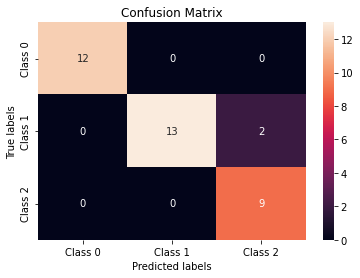

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Class 0','Class 1','Class 2']); ax.yaxis.set_ticklabels(['Class 0','Class 1','Class 2']);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.87      0.93        15
           2       0.82      1.00      0.90         9

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.94        36
weighted avg       0.95      0.94      0.95        36



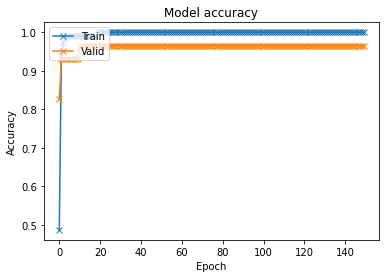

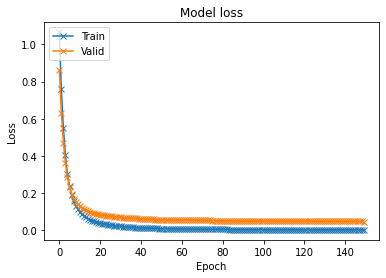

In [ ]:
# Plot training & validation accuracy values
plt.plot(history3.history_['accuracy'],'x-')
plt.plot(history3.history_['val_accuracy'],'x-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history_['loss'],'x-')
plt.plot(history3.history_['val_loss'],'x-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()